# Segmentation using CellPose

Documentation : https://cellpose.readthedocs.io/en/latest/


## On the VSC, load the modules:

**_NOTE:_**  to find a module X, use ` module av |& grep -i x`

We need the follwing module

```bash
module load Cellpose/2.2.2-foss-2022a
module load scikit-image/0.19.3-foss-2022a
```

In [8]:
from cellpose import models, io
import numpy as np
from skimage.data import human_mitosis
from cellpose import plot
import matplotlib.pyplot as plt
from skimage import measure
from skimage.measure import regionprops_table
import pandas as pd





## Load a sample image of nuclei

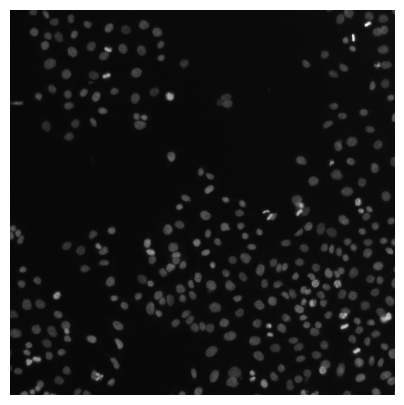

In [3]:
image = human_mitosis()
fig = plt.figure(figsize=(12,5))
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

## Load the cellpose model 'nuclei'

In [4]:
model = models.Cellpose(gpu=False, model_type='nuclei')

c:\Users\u0094799\.conda\envs\cellpose-aiscimageio-gpu\Lib\site-packages\cellpose\resnet_torch.py:280: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(

## Segment using cellpose

In [5]:
channels = [0,0] # This means we are processing single-channel greyscale images.

masks, flows, styles, diams = model.eval(image, diameter=None, channels=channels)

## Plot the result

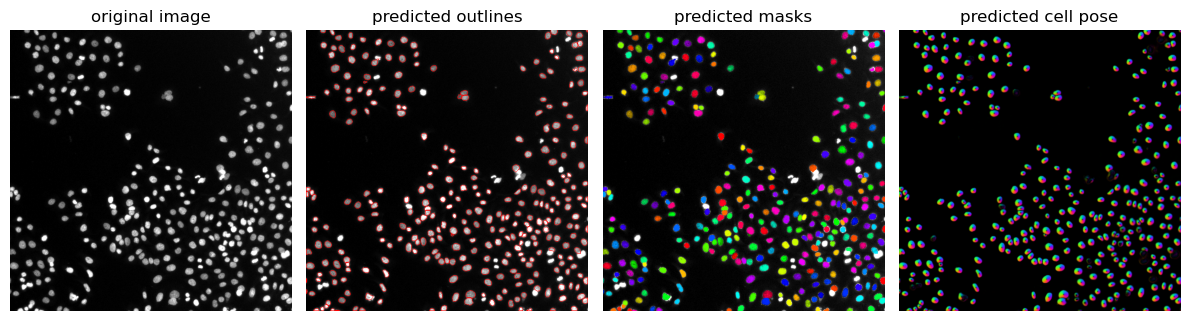

In [6]:
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, image, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

## Feature extraction

In [9]:
properties = measure.regionprops(masks, intensity_image=image)

features_table = regionprops_table(masks, intensity_image=image,
                                                      properties=['label','centroid', 'area', 
                                                                  'max_intensity', 'mean_intensity',
                                                                  'min_intensity'],
                                                    )
df_features = pd.DataFrame(features_table)
#df_features.to_csv("nuclei_analysis.csv")
df_features



,label,centroid-0,centroid-1,area,max_intensity,mean_intensity,min_intensity
0,1,2.800000,30.553846,65.0,63.0,49.938462,30.0
1,2,5.028169,47.098592,71.0,86.0,59.605634,27.0
2,3,4.316667,450.158333,120.0,82.0,61.666667,39.0
3,4,2.150000,509.750000,20.0,78.0,57.300000,35.0
4,5,7.312500,477.362500,80.0,69.0,57.150000,42.0
...,...,...,...,...,...,...,...
306,307,509.333333,18.428571,42.0,102.0,80.904762,45.0
307,308,509.451613,48.000000,31.0,100.0,76.903226,41.0
308,309,509.292683,228.439024,41.0,87.0,64.585366,36.0
309,310,509.529412,405.529412,34.0,119.0,84.500000,52.0
